# Estimating Intrinsic Dimension using Local Scale SVD

In [85]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy.linalg import svd
from scipy.spatial import distance_matrix
import sys; sys.path.append('../')
from toolbox import select_dimension, sample_unif_spheres
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
d = 10
n = 1000
d_embedded = 100

In [87]:
X = sample_unif_spheres(n, d, d_embedded)

In [135]:
D = distance_matrix(X,X) / np.sqrt(d_embedded)

In [136]:
i = 1

In [139]:
rs = np.arange(0.1,0.28,0.01)
evals = []
for r in rs:
    j = np.where((0 < D[i]) & (D[i] < r))[0]
    _,s,_ = svd(X[j])
    evals.append(np.hstack((s, np.zeros(d_embedded - len(s)))))

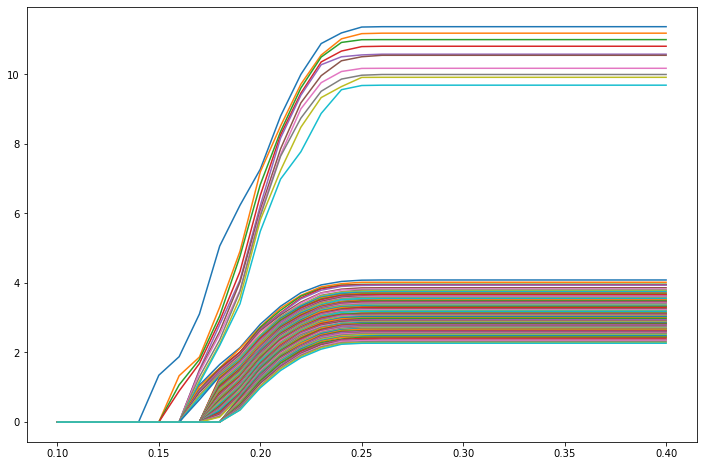

In [140]:
fig = plt.subplots(1,1,figsize=(12,8))
plt.plot(rs,evals)
plt.show()

In [145]:
rs = np.arange(0.1,0.28,0.01)
elbos1 = list()
elbos2 = list()
for r in rs:
    j = np.where((0 < D[i]) & (D[i] < r))[0]
    _,s,_ = svd(X[j])
    elbo2 = select_dimension(np.hstack((s, np.zeros(d_embedded - len(s)))), n_elbows=2)
    elbos1 += [elbo1]
    elbos2 += [elbo2]

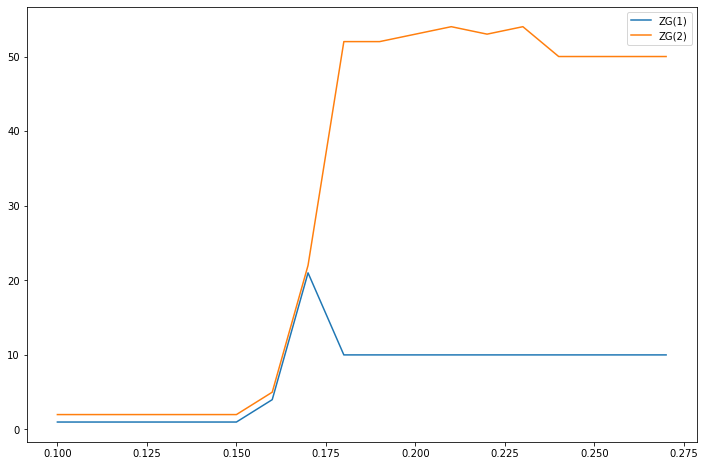

In [153]:
fig = plt.subplots(1,1,figsize=(12,8))
plt.plot(rs,[e[0][0] for e in elbos2], label='ZG(1)')
plt.plot(rs,[e[0][1] for e in elbos2], label='ZG(2)')
plt.legend()
plt.show()